In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = datasets.load_iris()
iris_data = iris.data # 花萼 長度 花萼 寬度 花瓣長度 屬種
iris_label = iris.target

In [3]:
iris_data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
#由於KNN分類法是藉由確認最近的觀察值來預測分類，因此變數的比例就會影響很大。
#載入標準化比例尺（StandardScaler）套件
from sklearn.preprocessing import StandardScaler
iris_data = pd.DataFrame(iris_data)

scaler = StandardScaler()
scaler.fit(iris_data)
scaled_features = scaler.transform(iris_data)
df_feat = pd.DataFrame(scaled_features,columns=iris_data.columns)
df_feat.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [5]:
train_data , test_data , train_label , test_label = train_test_split(df_feat,iris_label,test_size=0.2) # 切資料

Text(0, 0.5, 'Error Rate')

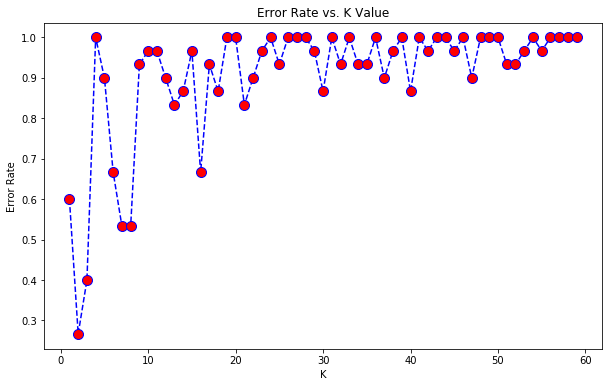

In [7]:
error_rate = []
for i in range(1,60):
    
    kmean =  KMeans(n_clusters=i)
    kmean.fit(train_data,train_label)
    pred_i = kmean.predict(test_data)
    error_rate.append(np.mean(pred_i != test_label))


#將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5%-6%之間震盪，
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [9]:
kmean =  KMeans(n_clusters=3)
kmean.fit(train_data,train_label)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
print(kmean.predict(test_data))

[1 1 1 0 2 1 2 0 2 0 2 0 1 2 0 1 0 0 2 0 0 0 1 1 0 2 1 1 1 0]


In [11]:
print(test_label)

[2 2 2 0 1 2 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 2 1 0 2 1 2 2 0]
